In [73]:
import random, os
import numpy as np
import torch
import glob

def seed_everything(seed: int):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    
seed_everything(42)

In [74]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

In [75]:
import pandas as pd

train_df = pd.read_csv('train/cleaned_train.csv')
train_df['date_orig'] = pd.to_datetime(train_df['date'], format='%Y-%m-%d %H:%M:%S')
train_df['date_int'] = train_df['date_orig'].apply(lambda x: x.value// 10 ** 9)
train_df.head()

,id,date,employee,action,date_orig,date_int
0,1256,2022-05-24 08:08:36,2,15.0,2022-05-24 08:08:36,1653379716
1,1257,2022-05-24 08:08:37,2,4.0,2022-05-24 08:08:37,1653379717
2,1258,2022-05-24 08:12:13,3,15.0,2022-05-24 08:12:13,1653379933
3,1259,2022-05-24 08:12:25,3,2.0,2022-05-24 08:12:25,1653379945
4,1260,2022-05-24 08:12:42,3,12.0,2022-05-24 08:12:42,1653379962


In [76]:
parsed_time_train1_df=pd.read_csv('parsed_time_train1.txt',sep='\t',names=['frame','date'])
parsed_time_train1_df['date_orig'] = pd.to_datetime(parsed_time_train1_df['date'], format='%m-%d-%Y %a %H:%M:%S')
parsed_time_train1_df['date'] = parsed_time_train1_df['date_orig'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
parsed_time_train1_df['date_int'] = parsed_time_train1_df['date_orig'].apply(lambda x: x.value// 10 ** 9)
parsed_time_train1_df.head()

,frame,date,date_orig,date_int
0,1,2022-05-24 08:08:33,2022-05-24 08:08:33,1653379713
1,2,2022-05-24 08:08:34,2022-05-24 08:08:34,1653379714
2,3,2022-05-24 08:08:34,2022-05-24 08:08:34,1653379714
3,4,2022-05-24 08:08:34,2022-05-24 08:08:34,1653379714
4,5,2022-05-24 08:08:34,2022-05-24 08:08:34,1653379714


In [77]:
SPLIT_TRAIN1_AND_TRAIN2_ID=2522
train_df[train_df['id']<SPLIT_TRAIN1_AND_TRAIN2_ID].head()

,id,date,employee,action,date_orig,date_int
0,1256,2022-05-24 08:08:36,2,15.0,2022-05-24 08:08:36,1653379716
1,1257,2022-05-24 08:08:37,2,4.0,2022-05-24 08:08:37,1653379717
2,1258,2022-05-24 08:12:13,3,15.0,2022-05-24 08:12:13,1653379933
3,1259,2022-05-24 08:12:25,3,2.0,2022-05-24 08:12:25,1653379945
4,1260,2022-05-24 08:12:42,3,12.0,2022-05-24 08:12:42,1653379962


In [78]:
df = pd.merge(train_df[train_df['id']<SPLIT_TRAIN1_AND_TRAIN2_ID], parsed_time_train1_df, on=['date'], how="outer", indicator=True)
# df = df[df['_merge'] == 'left_only']
df = df[df['_merge'] == 'both']
df.head()

,id,date,employee,action,date_orig_x,date_int_x,frame,date_orig_y,date_int_y,_merge
0,1256.0,2022-05-24 08:08:36,2.0,15.0,2022-05-24 08:08:36,1.653380e+09,12.0,2022-05-24 08:08:36,1.653380e+09,both
1,1256.0,2022-05-24 08:08:36,2.0,15.0,2022-05-24 08:08:36,1.653380e+09,13.0,2022-05-24 08:08:36,1.653380e+09,both
2,1256.0,2022-05-24 08:08:36,2.0,15.0,2022-05-24 08:08:36,1.653380e+09,14.0,2022-05-24 08:08:36,1.653380e+09,both
3,1256.0,2022-05-24 08:08:36,2.0,15.0,2022-05-24 08:08:36,1.653380e+09,15.0,2022-05-24 08:08:36,1.653380e+09,both
4,1256.0,2022-05-24 08:08:36,2.0,15.0,2022-05-24 08:08:36,1.653380e+09,16.0,2022-05-24 08:08:36,1.653380e+09,both


## У дальных дверей людей плохо видно, поэтому зумим

### передние двери

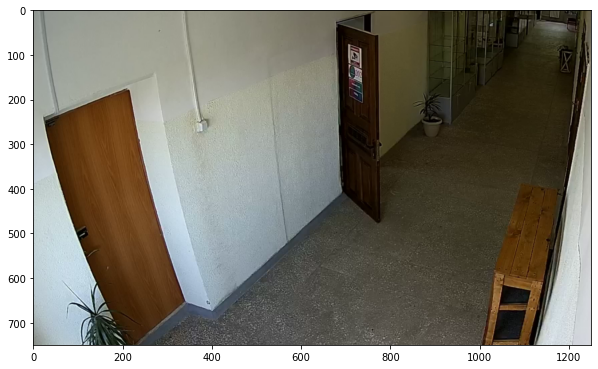

In [79]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

train1_path="/home/hacaton_irkutsk/train/train1"
img = cv2.imread(f"{train1_path}/out1.png", cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
newsize = (1920,1080)
  
# resize image
resized = cv2.resize(img, newsize, interpolation = cv2.INTER_AREA)
crop = resized[300:1050,100:1350]


fig = plt.figure(figsize=(10, 10))
plt.imshow(crop)
plt.show()

In [80]:
front_door_borders=[300,100,1050,1350] # row_top,col_top,row_bottom,col_bottom
front_door_ids=[1,2,7,8,9]

### back doors

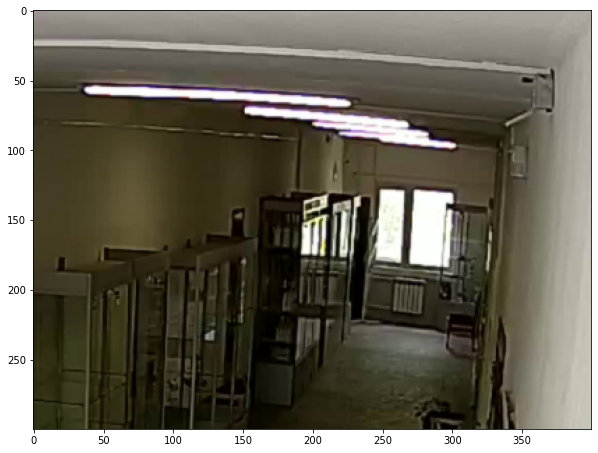

In [81]:
train1_path="/home/hacaton_irkutsk/train/train1"
img = cv2.imread(f"{train1_path}/out1.png", cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
newsize = (1920,1080)
  
# resize image
resized = cv2.resize(img, newsize, interpolation = cv2.INTER_AREA)
crop = resized[100:400,1000:1400]


fig = plt.figure(figsize=(10, 10))
plt.imshow(crop)
plt.show()

In [82]:
back_door_borders=[100,1000,400,1400] # row_top,col_top,row_bottom,col_bottom
back_door_ids=[3,4,5,6]

# Create door detect dataset

In [83]:
start_actions={}
for i in range(1,10):
    start_actions[i+10]=i

end_actions={}
for i in range(1,10):
    end_actions[i]=i

In [84]:
action_frames={}
action_times={}
for ind in df.index:
    action=int(df['action'][ind])
    frame=int(df['frame'][ind])
    date_orig=df['date_orig_x'][ind]
    
    
    if action not in action_frames:
        action_frames[action]=[]
        action_times[action]=[]
    
    action_frames[action].append(frame)    
    action_times[action].append(date_orig)

In [85]:
for i in range(1,20):
    if i==10:
        continue
    if i in action_frames:
        print(f"Action {i}: {len(action_frames[i])}")
    else:
        print(f"Action {i}: empty")

Action 1: 30
Action 2: 676
Action 3: 285
Action 4: 963
Action 5: 924
Action 6: 125
Action 7: empty
Action 8: 40
Action 9: 50
Action 11: 30
Action 12: 685
Action 13: 270
Action 14: 989
Action 15: 938
Action 16: 113
Action 17: empty
Action 18: 35
Action 19: 60


In [86]:
people_detect_model = torch.hub.load('ultralytics/yolov5','custom', 'yolov5x6') #'ultralytics/yolov5', 'custom', 'yolov5s-cls.pt'
people_detect_model.classes = [0]

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-8-10 Python-3.8.10 torch-1.13.0.dev20220701+cu116 CUDA:0 (NVIDIA GeForce RTX 3090, 24268MiB)

Fusing layers... 
YOLOv5x6 summary: 574 layers, 140730220 parameters, 0 gradients
Adding AutoShape... 


In [87]:
action_frames[11]

[8709,
 8710,
 8711,
 8712,
 8713,
 8719,
 8720,
 8721,
 8722,
 8723,
 22348,
 22349,
 22350,
 22351,
 22352,
 24599,
 24600,
 24601,
 24602,
 24603,
 24678,
 24679,
 24680,
 24681,
 24682,
 35050,
 35051,
 35052,
 35053,
 35054]

In [88]:
action_times[11]

[Timestamp('2022-05-24 12:22:16'),
 Timestamp('2022-05-24 12:22:16'),
 Timestamp('2022-05-24 12:22:16'),
 Timestamp('2022-05-24 12:22:16'),
 Timestamp('2022-05-24 12:22:16'),
 Timestamp('2022-05-24 12:22:18'),
 Timestamp('2022-05-24 12:22:18'),
 Timestamp('2022-05-24 12:22:18'),
 Timestamp('2022-05-24 12:22:18'),
 Timestamp('2022-05-24 12:22:18'),
 Timestamp('2022-05-24 18:49:21'),
 Timestamp('2022-05-24 18:49:21'),
 Timestamp('2022-05-24 18:49:21'),
 Timestamp('2022-05-24 18:49:21'),
 Timestamp('2022-05-24 18:49:21'),
 Timestamp('2022-05-24 20:17:01'),
 Timestamp('2022-05-24 20:17:01'),
 Timestamp('2022-05-24 20:17:01'),
 Timestamp('2022-05-24 20:17:01'),
 Timestamp('2022-05-24 20:17:01'),
 Timestamp('2022-05-24 20:22:44'),
 Timestamp('2022-05-24 20:22:44'),
 Timestamp('2022-05-24 20:22:44'),
 Timestamp('2022-05-24 20:22:44'),
 Timestamp('2022-05-24 20:22:44'),
 Timestamp('2022-05-25 08:11:30'),
 Timestamp('2022-05-25 08:11:30'),
 Timestamp('2022-05-25 08:11:30'),
 Timestamp('2022-05-

In [89]:
door_coord_items=[]
for k in start_actions:
    if k not in action_frames:
        continue
    frames = action_frames[k]
    # row_top,col_top,row_bottom,col_bottom
    crop_box= front_door_borders if start_actions[k] in front_door_ids else back_door_borders
    print("Action ", k)
    print("front" if start_actions[k] in front_door_ids else "back")
    
    for fid in frames:
#         print('frame:', fid)
        detected_count=0
        for i in range(fid,fid+5):
#             print(i)
            img = cv2.imread(f"{train1_path}/out{int(i)}.png", cv2.IMREAD_UNCHANGED)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            newsize = (1920,1080)
            resized = cv2.resize(img, newsize, interpolation = cv2.INTER_AREA)

            # front doors
            crop = resized[crop_box[0]:crop_box[2],crop_box[1]:crop_box[3]]

            results = people_detect_model(crop)
            if results.xyxy[0].shape == torch.Size([1, 6]):
                print('detect')
                detected_count+=1
                find_region=results.xyxy[0][0].cpu().numpy()
                bbox=np.array(find_region[:4])
                bbox = bbox.astype(int)
                bbox[1]+=crop_box[0]
                bbox[3]+=crop_box[0]
                bbox[0]+=crop_box[1]
                bbox[2]+=crop_box[1]
                door_coord_items.append({
                    'door':start_actions[k],
                    'xmin':bbox[0],
                    'ymin':bbox[1],
                    'xmax':bbox[2],
                    'ymax':bbox[3],
                })
                
                break


Action  11
front
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
Action  12
front
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect


detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect

detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
Action  16
back
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
dete

In [90]:
for k in end_actions:
    if k not in action_frames:
        continue
    frames = action_frames[k]
    # row_top,col_top,row_bottom,col_bottom
    crop_box= front_door_borders if end_actions[k] in front_door_ids else back_door_borders
    print("Action ", k)
    print("front" if end_actions[k] in front_door_ids else "back")
    
    for fid in frames:
#         print('frame:', fid)
        detected_count=0
        for i in reversed(range(fid-15,fid+1)):
#             print(i)
            img = cv2.imread(f"{train1_path}/out{int(i)}.png", cv2.IMREAD_UNCHANGED)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            newsize = (1920,1080)
            resized = cv2.resize(img, newsize, interpolation = cv2.INTER_AREA)

            # front doors
            crop = resized[crop_box[0]:crop_box[2],crop_box[1]:crop_box[3]]

            results = people_detect_model(crop)
            if results.xyxy[0].shape == torch.Size([1, 6]):
#                 print('detect')
                detected_count+=1
                find_region=results.xyxy[0][0].cpu().numpy()
                bbox=np.array(find_region[:4])
                bbox = bbox.astype(int)
                bbox[1]+=crop_box[0]
                bbox[3]+=crop_box[0]
                bbox[0]+=crop_box[1]
                bbox[2]+=crop_box[1]
                door_coord_items.append({
                    'door':end_actions[k],
                    'xmin':bbox[0],
                    'ymin':bbox[1],
                    'xmax':bbox[2],
                    'ymax':bbox[3],
                })
                break


Action  1
front
Action  2
front
Action  4
back
Action  5
back
Action  6
back
Action  8
front
Action  9
front


In [91]:
len(door_coord_items)

5482

In [92]:
door_coord_df = pd.DataFrame(door_coord_items)
door_coord_df.head()

,door,xmin,ymin,xmax,ymax
0,1,208,666,397,1049
1,1,208,666,397,1049
2,1,208,666,397,1049
3,1,208,666,397,1049
4,1,232,661,476,1049


In [93]:
door_coord_df.to_csv('door_coord_df_single.csv', index=False)

In [94]:
door_coord_df[door_coord_df['door']==10].shape

(0, 5)